In [1]:
from astropy.table import Table, Column
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import pairplot
from sklearn.cluster import DBSCAN
from numpy.linalg import norm
from scipy.spatial import distance
# Assuming you have located the table fits file in the same directory 
tab = Table.read('data/DR16Q_v4.fits')
tab.colnames
psfflux = np.array(tab['PSFFLUX'])
Fu = psfflux[:,0]
Fg = psfflux[:,1]
Fr = psfflux[:,2]
Fi = psfflux[:,3]
Fz = psfflux[:,4]

#  SDSS flux inverse variance
psfflux_ivar = tab['PSFFLUX_IVAR']
psfflux_SN = psfflux*psfflux_ivar


# SDSS FLux Signal tp Noise -> Flux*(1/Flux_variance)
Fu_SN = psfflux_SN[:,0]
Fu_SN = psfflux_SN[:,0]
Fg_SN = psfflux_SN[:,1]
Fr_SN = psfflux_SN[:,2]
Fi_SN = psfflux_SN[:,3]
Fz_SN = psfflux_SN[:,4]

# WISE fluxes
W1_Flux = tab['W1_FLUX']
W2_Flux = tab['W2_FLUX']

# Wise Flux inverse variance 
W1_Flux_ivar = tab['W1_FLUX_IVAR']
W2_Flux_ivar = tab['W2_FLUX_IVAR']

W1_SN, W2_SN = W1_Flux*W1_Flux_ivar, W2_Flux*W1_Flux_ivar

#  Other features 
redshift = tab['Z']
zwarning = tab['ZWARNING']
e=2
mask = (Fu_SN>e) & (Fg_SN>e) & (Fr_SN>e) & (Fi_SN>e) &(Fz_SN>e) & (redshift>0) & (zwarning==0)   & (W1_SN>e) & (W2_SN>e) 

#  SDSS-SDSS flux ratios
Fug = np.log(Fu[mask]/Fg[mask])
Fur = np.log(Fu[mask]/Fr[mask])
Fui = np.log(Fu[mask]/Fi[mask])
Fuz = np.log(Fu[mask]/Fz[mask])
Fgr = np.log(Fg[mask]/Fr[mask])
Fgi = np.log(Fg[mask]/Fi[mask])
Fgz = np.log(Fg[mask]/Fz[mask])
Fri = np.log(Fr[mask]/Fi[mask])
Frz = np.log(Fr[mask]/Fz[mask])
Fiz = np.log(Fi[mask]/Fz[mask])

# WISE-WISE flux ratios
FW1W2 = np.log(W1_Flux[mask]/W2_Flux[mask])

# SDSS-WISE flux ratios
FuW1 = np.log(Fu[mask]/W1_Flux[mask])
FuW2 = np.log(Fu[mask]/W2_Flux[mask])
FgW1 = np.log(Fg[mask]/W1_Flux[mask])
FgW2 = np.log(Fg[mask]/W2_Flux[mask])
FrW1 = np.log(Fr[mask]/W1_Flux[mask])
FrW2 = np.log(Fr[mask]/W2_Flux[mask])
FiW1 = np.log(Fi[mask]/W1_Flux[mask])
FiW2 = np.log(Fi[mask]/W2_Flux[mask])
FzW1 = np.log(Fz[mask]/W1_Flux[mask])
FzW2 = np.log(Fz[mask]/W2_Flux[mask])
data = np.array(list(zip(Fui,Fuz,FuW1,FuW2,Fgz,FgW1,FgW2,FrW1,FrW2,FiW2)))
data_scaled = StandardScaler().fit_transform(data)
df = pd.DataFrame(data=data_scaled, columns=['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
print(df.head())

        Fui       Fuz      FuW1      FuW2       Fgz      FgW1      FgW2  \
0  0.436092  0.389854  0.427525  0.367582  0.446076  0.401342  0.315095   
1  0.609372  0.518287  1.458968  1.326332  0.159813  1.398188  1.193396   
2 -0.242792 -0.194903 -0.034337 -0.467140 -0.223497  0.020784 -0.504167   
3  0.399934  0.265061 -0.161991 -0.280287  0.192551 -0.346825 -0.497565   
4 -1.103255 -0.922966 -0.780236 -1.200414 -1.221349 -0.753590 -1.244677   

       FrW1      FrW2      FiW2  
0  0.372280  0.273568  0.068571  
1  1.455461  1.234102  1.317567  
2  0.102368 -0.499317 -0.432786  
3 -0.309674 -0.484347 -0.865260  
4 -0.179549 -0.711942 -0.580097  


In [ ]:
pointId=1
points=[]
large=0
#for j in range(len(df)):
     #count=0
     #large=large+1
     #for i in range(len(df)):
        #Euclidian distance using L2 Norm
            #x=distance.euclidean(df[i:i+1],df[j:j+1])
                #points.append(i)
            #print(x)
            #count=count+1
            #print(large)
            #print(count)
            #print(j,i)
all_labes=[]            
for eps in  np.linspace(0.6, 1.2, 7):        
    db=DBSCAN(eps=eps,min_samples=11)
    model=db.fit(df)
    label=model.labels_
    plt.hist(label[label>0])
    plt.title('#-1:'+str(sum(label==-1)) +
    ', #0:'+str(sum(label==0)) +
    ', #1:'+str(sum(label==1))+
    ', #2:'+str(sum(label==2))+
    ', #3:'+str(sum(label==3)) + 
    ', #4:'+str(sum(label==4)))
    all_labes.append(label)
    plt.savefig('label-hist-eps%.2f.pdf'%(eps))
    plt.show()
    plt.clf()
    plt.close()
    plt.cla()
np.savetxt('all_labels.dat', all_labes, fmt='%d')

In [2]:
all_labels = np.loadtxt('all_labels.dat')
# for i in range(7):
#     this_labels = all_labels[i]
#     n_cl = np.size(np.unique(this_labels))
#     print('eps',i)
#     for j in range(-1,n_cl):
#         print(sum(this_labels==j))

In [4]:
db=DBSCAN(eps=2,min_samples=5)
this_labels = all_labels[6]
model=db.fit(df[this_labels==-1])
label_noise=model.labels_
np.savetxt('label_noise.dat', label_noise)

In [6]:
n_cl = np.size(np.unique(label_noise))

for j in range(-1,n_cl):
    print(sum(label_noise==j))

205
394
33
16
5
5
0


In [39]:
from stacker import stacker, ParStacker

FIBERID = tab['FIBERID']
FIBERID=FIBERID[mask]

MJD = tab['MJD']
MJD=MJD[mask]
PLATE = tab['PLATE']
PLATE=PLATE[mask]
Z = tab['Z']
Z=Z[mask]

# median spectrum out of all objects in the main cluster -> label=0
label0 = (all_labels[6]==0)
MedSpec0 = stacker(Z[label0], PLATE[label0], 
                        MJD[label0], FIBERID[label0])
np.savetxt('MedSpec0-eps1.2-MinPts11.dat', MedSpec0)

  0%|          | 0/143924 [00:00<?, ?it/s]/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 143924/143924 [3:18:55<00:00, 12.06it/s]  


In [18]:
from stacker import stacker, ParStacker

FIBERID = tab['FIBERID']
FIBERID=FIBERID[mask]

MJD = tab['MJD']
MJD=MJD[mask]
PLATE = tab['PLATE']
PLATE=PLATE[mask]
Z = tab['Z']
Z=Z[mask]

# median spectrum out of all objects in the noise with label=1
FIBERID_NOISE = FIBERID[all_labels[6]==-1]
MJD_NOISE     = MJD[all_labels[6]==-1]
PLATE_NOISE   = PLATE[all_labels[6]==-1]
Z_NOISE       = Z[all_labels[6]==-1]

#label noise -1
label_noise_n1 = (label_noise==-1)
MedSpecNoise_n1 = stacker(Z_NOISE[label_noise_n1], PLATE_NOISE[label_noise_n1], 
                        MJD_NOISE[label_noise_n1], FIBERID_NOISE[label_noise_n1])
np.savetxt('MedSpec-Noise-Labeln1-eps2-MinPts5.dat', MedSpecNoise_n1)

#label noise 0
label_noise0 = (label_noise==0)
MedSpecNoise0 = stacker(Z_NOISE[label_noise0], PLATE_NOISE[label_noise0], 
                        MJD_NOISE[label_noise0], FIBERID_NOISE[label_noise0])
np.savetxt('MedSpec-Noise-Label0-eps2-MinPts5.dat', MedSpecNoise0)

# label noise 1
label_noise1 = (label_noise==1)
MedSpecNois1 = stacker(Z_NOISE[label_noise1], PLATE_NOISE[label_noise1], 
                        MJD_NOISE[label_noise1], FIBERID_NOISE[label_noise1])
np.savetxt('MedSpec-Noise-Label1-eps2-MinPts5.dat', MedSpecNoise1)

# label noise 2
label_noise2 = (label_noise==2)
MedSpecNoise2 = stacker(Z_NOISE[label_noise2], PLATE_NOISE[label_noise2], 
                        MJD_NOISE[label_noise2], FIBERID_NOISE[label_noise2])
np.savetxt('MedSpec-Noise-Label2-eps2-MinPts5.dat', MedSpecNoise2)


label_noise3 = (label_noise==3)
MedSpecNoise3 = stacker(Z_NOISE[label_noise3], PLATE_NOISE[label_noise3], 
                        MJD_NOISE[label_noise3], FIBERID_NOISE[label_noise3])
np.savetxt('MedSpec-Noise-Label3-eps2-MinPts5.dat', MedSpecNoise3)

label_noise4 = (label_noise==4)
MedSpecNoise4 = stacker(Z_NOISE[label_noise4], PLATE_NOISE[label_noise4], 
                        MJD_NOISE[label_noise4], FIBERID_NOISE[label_noise4])
np.savetxt('MedSpec-Noise-Label4-eps2-MinPts5.dat', MedSpecNoise4)


100%|██████████| 33/33 [00:02<00:00, 11.76it/s]
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
100%|██████████| 5/5 [00:00<00:00, 11.66it/s]


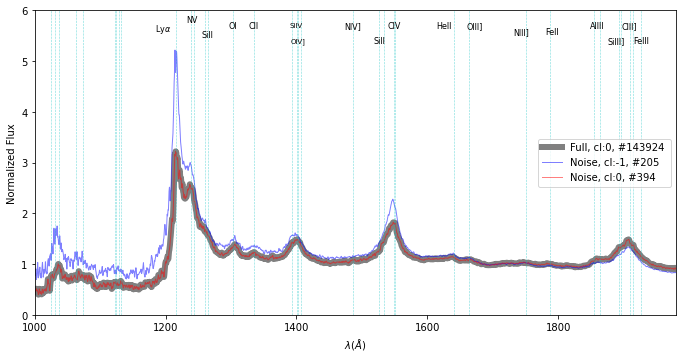

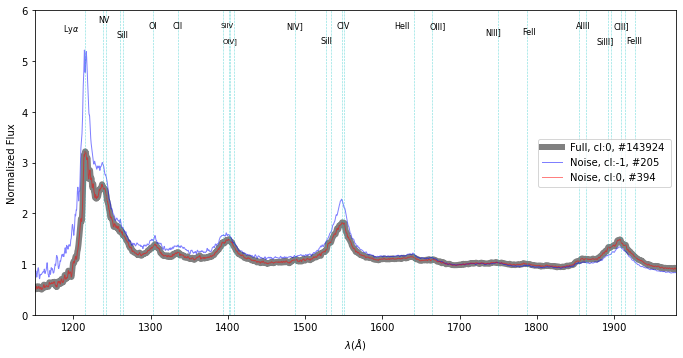

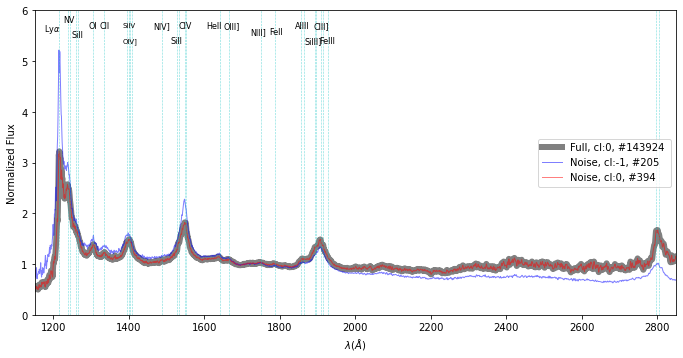

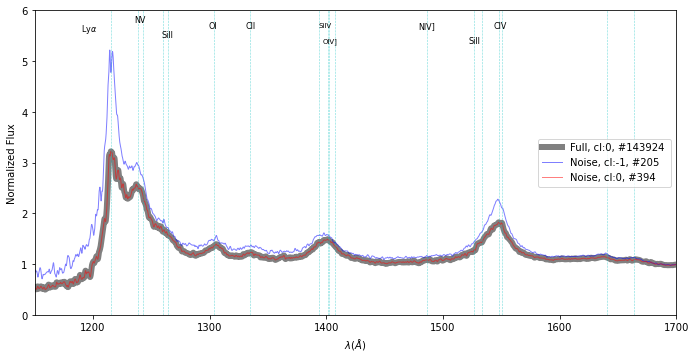

In [56]:
# Plotting Spectra -> REW

from scipy import ndimage
from line_db import line_db

c=['gray', 'red', 'green', 'black', 'blue' , 'darkred']
ymax=6

ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7

# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)

#  Median properties in each bin

for ii in range(4):

    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200

    
       
  
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')


    SmoothedMedSpec_n1    = ndimage.filters.gaussian_filter1d(MedSpecNoise_n1,2.0)
    SmoothedMedSpec0      = ndimage.filters.gaussian_filter1d(MedSpecNoise0,2.0)
    SmoothedMedSpec1      = ndimage.filters.gaussian_filter1d(MedSpecNoise1,2.0)
    SmoothedMedSpec2      = ndimage.filters.gaussian_filter1d(MedSpecNoise2,2.0)
    SmoothedMedSpec3      = ndimage.filters.gaussian_filter1d(MedSpecNoise3,2.0)
    SmoothedMedSpec4      = ndimage.filters.gaussian_filter1d(MedSpecNoise4,2.0)
    SmoothedMedSpec_cl0   = ndimage.filters.gaussian_filter1d(MedSpec0,2.0)
      
#     SmoothedMedSpec = medSpec

        # masking for plot ranges
    ind = (wgrid>lambda_min) & (wgrid<lambda_max)
    plt.plot(wgrid[ind],  SmoothedMedSpec0[ind], c=c[0], label = 'Full, cl:0, #%d '%(sum(label0)), lw=6)
    
    plt.plot(wgrid[ind],  SmoothedMedSpec_n1[ind], c='blue', label = 'Noise, cl:-1, #%d '%(sum(label_noise==-1)), lw=1, alpha=0.5)
    plt.plot(wgrid[ind],  SmoothedMedSpec0[ind], c='red', label = 'Noise, cl:0, #%d '%(sum(label_noise==0)), lw=1, alpha=0.5)
#     plt.plot(wgrid[ind],  SmoothedMedSpec1[ind], c=c[1], label = 'cl:1, #%d '%(sum(label_noise==1)))
#     plt.plot(wgrid[ind],  SmoothedMedSpec2[ind], c=c[2], label = 'cl:2, #%d '%(sum(label_noise==2)))
#     plt.plot(wgrid[ind],  SmoothedMedSpec3[ind], c=c[3], label = 'cl:3, #%d '%(sum(label_noise==3)))
#     plt.plot(wgrid[ind],  SmoothedMedSpec4[ind], c=c[4], label = 'cl:4, #%d '%(sum(label_noise==4)))



    plt.legend(loc=7)

    line_db(ymax, fs, fs1, ii) 
    fig_path = 'med-spec-%d-%d.png'%(lambda_min, lambda_max)

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()




In [68]:
labels = all_labels[6]


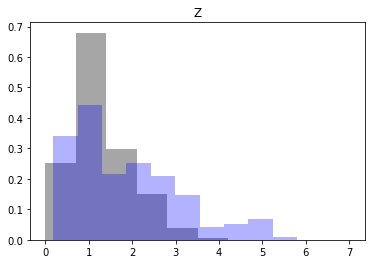

In [148]:
#  Investigating median properties 
Z0 = Z[labels==0]
Z_noise = Z[labels==-1]
Z_noise_noise = Z_noise[label_noise==-1]

plt.hist(Z0, density=True, alpha=0.7, color ='gray')
# plt.hist(Z_noise, density=True, alpha=0.3, color='red')
plt.hist(Z_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('Z')
plt.show()

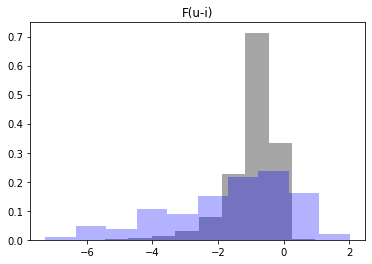

In [125]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
#  Investigating median properties 
Fui0 = Fuz[labels==0]
Fui_noise = Fui[labels==-1]
Fui_noise_noise = Fui_noise[label_noise==-1]

plt.hist(Fui0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fui_noise, density=True, alpha=0.3, color='red')
plt.hist(Fui_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-i)')
plt.show()

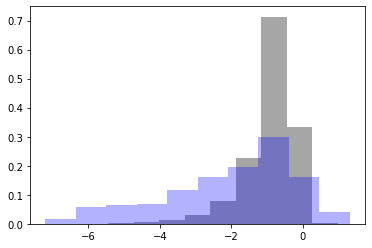

In [126]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
Fuz0 = Fuz[labels==0]
Fuz_noise = Fuz[labels==-1]
Fuz_noise_noise = Fuz_noise[label_noise==-1]

plt.hist(Fuz0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fuz_noise, density=True, alpha=0.3, color='red')
plt.hist(Fuz_noise_noise, density=True, alpha=0.3, color='blue')
plt.show()

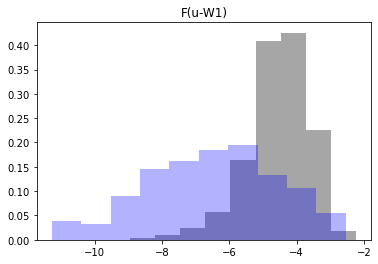

In [151]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
#  Investigating median properties 
FuW10 = FuW1[labels==0]
FuW1_noise = FuW1[labels==-1]
FuW1_noise_noise = FuW1_noise[label_noise==-1]

p,h,p2 =plt.hist(FuW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FuW1_noise, density=True, alpha=0.3, color='red')
p0, h0, p2= plt.hist(FuW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-W1)')
plt.savefig('histFuw1.png', dpi=1800)
plt.show()

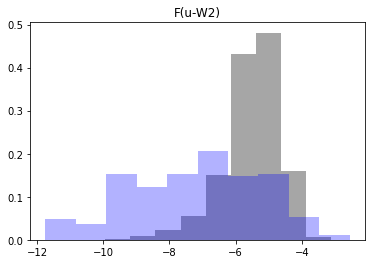

In [150]:

# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FuW20 = FuW2[labels==0]
FuW2_noise = FuW2[labels==-1]
FuW2_noise_noise = FuW2_noise[label_noise==-1]

plt.hist(FuW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FuW2_noise, density=True, alpha=0.3, color='red')
plt.hist(FuW2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-W2)')
plt.savefig('histFuw2.png', dpi=1800)

plt.show()

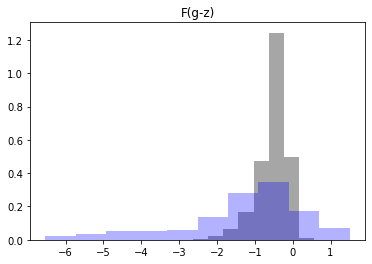

In [129]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
Fgz0 = Fgz[labels==0]
Fgz_noise = Fgz[labels==-1]
Fgz_noise_noise = Fgz_noise[label_noise==-1]

plt.hist(Fgz0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fgz_noise, density=True, alpha=0.3, color='red')
plt.hist(Fgz_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-z)')

plt.show()

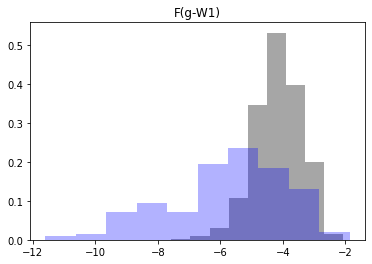

In [130]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW10 = FgW1[labels==0]
FgW1_noise = FgW1[labels==-1]
FgW1_noise_noise = FgW1_noise[label_noise==-1]

plt.hist(FgW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-W1)')

plt.show()

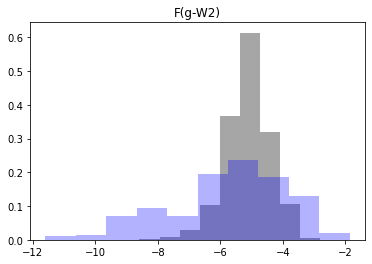

In [131]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW20 = FgW2[labels==0]
FgW2_noise = FgW2[labels==-1]
FgW2_noise_noise = FgW2_noise[label_noise==-1]

plt.hist(FgW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-W2)')

plt.show()

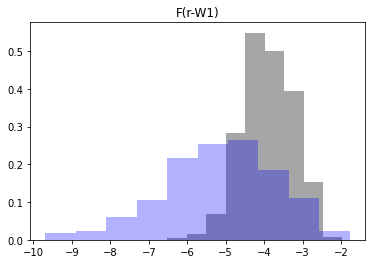

In [132]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FrW10 = FrW1[labels==0]
FrW1_noise = FrW1[labels==-1]
FrW1_noise_noise = FrW1_noise[label_noise==-1]

plt.hist(FrW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FrW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(r-W1)')

plt.show()

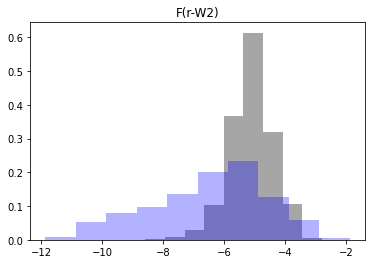

In [133]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW20 = FgW2[labels==0]
FgW2_noise = FgW2[labels==-1]
FgW2_noise_noise = FgW2_noise[label_noise==-1]

plt.hist(FgW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW2_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(r-W2)')

plt.show()

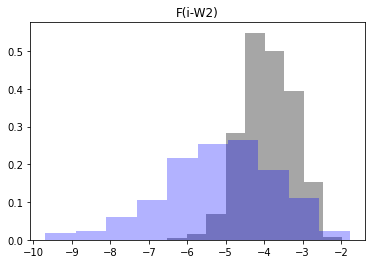

In [134]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FrW10 = FrW1[labels==0]
FrW1_noise = FrW1[labels==-1]
FrW1_noise_noise = FrW1_noise[label_noise==-1]

plt.hist(FrW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FrW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(i-W2)')

plt.show()

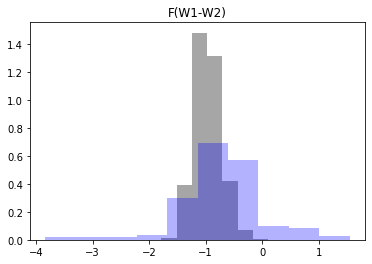

In [136]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FW1W20 = FW1W2[labels==0]
FW1W2_noise = FW1W2[labels==-1]
FW1W2_noise_noise = FW1W2_noise[label_noise==-1]

plt.hist(FW1W20, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FW1W2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(W1-W2)')

plt.show()

In [188]:
from sklearn.decomposition import PCA
import seaborn as sns
data_with_clust = pd.concat([df,pd.DataFrame({'cluster':this_labels})], axis = 1)
#print(data_with_clust.head())
outlier=data_with_clust[data_with_clust['cluster']!=0]
#print(outlier.head())
pca=PCA(n_components=3)
principal_comp=pca.fit_transform(df)
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3'])
# pca_df.head()
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':this_labels})], axis = 1)
pca_df.head()
# plt.figure(figsize=(10,10))
# filt=(pca_df['cluster']<1)
# #print(pca_df[filt].head())
# #ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df[filt])
# ax = sns.scatterplot(x="pca1", y="pca2", z="pca3", hue = "cluster", data = pca_df)
# plt.show()
# print(len(outlier))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# %matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = FuW1 # pca_df['pca1']
# y = FuW2 #pca_df['pca2']
z = FiW2 #pca_df['pca3']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
cc=['red', 'gray']
color=[]
for i in range(len(df)):
    color.append(cc[int(this_labels[i])+1])
ax.scatter(x,  z, c=color, alpha=0.4, s=1)

plt.show()